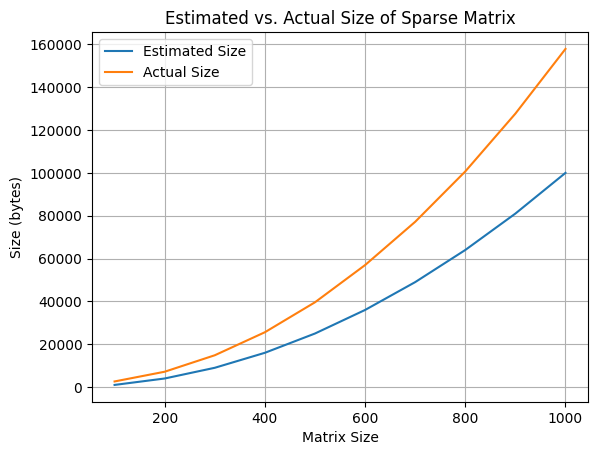

In [5]:
import numpy as np
from scipy.sparse import csr_matrix, save_npz
import os
import matplotlib.pyplot as plt

# Function to generate and save sparse matrix, return estimated and actual sizes
def generate_and_save_sparse_matrix(num_rows, num_cols):
    data = np.random.randint(-100, 101, size=(num_rows * num_cols))
    data[data == 0] = 1  # Ensure some zero elements for sparsity
    data = data.astype(np.int16)
    data[data == 1] = 0  # Set some elements to zero for sparsity
    data = np.random.choice(data, size=int(0.05 * len(data)))  # Keep only 5% non-zero elements
    data = data[np.random.permutation(len(data))]  # Shuffle data
    indices = np.random.randint(0, num_cols, size=len(data))

    # Calculate indptr array
    indptr = np.zeros(num_rows + 1, dtype=int)
    indptr[1:] = np.cumsum(np.bincount(indices, minlength=num_cols))

    matrix = csr_matrix((data, indices, indptr), shape=(num_rows, num_cols))

    # Estimate the size of the sparse matrix
    non_zero_elements = matrix.nnz
    dtype_size_bytes = np.dtype(matrix.dtype).itemsize
    total_size_bytes_estimate = non_zero_elements * dtype_size_bytes

    # Save the sparse matrix to a temporary file
    file_name = "sparse_matrix_temp.npz"
    save_npz(file_name, matrix)

    # Get the size of the saved file
    file_size_bytes = os.path.getsize(file_name)

    # Delete the temporary file
    os.remove(file_name)

    return total_size_bytes_estimate, file_size_bytes

# Parameters
num_matrices = 10  # Number of matrices to generate
max_size = 1000  # Maximum size of matrices
step_size = 100  # Step size for increasing matrix size

# Generate sizes and corresponding estimated and actual sizes
sizes = np.arange(step_size, max_size + step_size, step_size)
estimated_sizes = []
actual_sizes = []

for size in sizes:
    estimated_size, actual_size = generate_and_save_sparse_matrix(size, size)
    estimated_sizes.append(estimated_size)
    actual_sizes.append(actual_size)

# Plot the graph
plt.plot(sizes, estimated_sizes, label='Estimated Size')
plt.plot(sizes, actual_sizes, label='Actual Size')
plt.xlabel('Matrix Size')
plt.ylabel('Size (bytes)')
plt.title('Estimated vs. Actual Size of Sparse Matrix')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import numpy as np
from scipy.sparse import csr_matrix, save_npz
import os

# Function to generate and save sparse matrix, return estimated and actual sizes
def generate_and_save_sparse_matrix(num_rows, num_cols, density):
    # Calculate the number of non-zero elements
    num_non_zero_elements = int(num_rows * num_cols * density)

    # Generate random indices and values for non-zero elements
    data = np.random.randint(-100, 101, size=num_non_zero_elements).astype(np.int16)
    indices = np.random.randint(0, num_cols, size=num_non_zero_elements)
    indptr = np.zeros(num_rows + 1, dtype=int)
    for i in range(1, num_rows + 1):
        indptr[i] = indptr[i - 1] + np.random.randint(1, num_cols // 10)  # Ensure some sparsity

    # Ensure that the last value of indptr is less than the size of indices and data arrays
    indptr[-1] = min(indptr[-1], num_non_zero_elements)

    # Create the csr_matrix
    matrix = csr_matrix((data, indices, indptr), shape=(num_rows, num_cols), dtype=np.int8)

    # Estimate the size of the sparse matrix
    non_zero_elements = matrix.nnz
    dtype_size_bytes = np.dtype(matrix.dtype).itemsize
    total_size_bytes_estimate = non_zero_elements * dtype_size_bytes

    # Save the sparse matrix to a temporary file
    file_name = "sparse_matrix_temp.npz"
    save_npz(file_name, matrix)

    # Get the size of the saved file
    file_size_bytes = os.path.getsize(file_name)

    # Delete the temporary file
    os.remove(file_name)

    return total_size_bytes_estimate, file_size_bytes

# Parameters
num_rows = 800
num_cols = 350000
density = 0.01  # 1% density

# Generate and save sparse matrix
estimated_size, actual_size = generate_and_save_sparse_matrix(num_rows, num_cols, density)

# Print the results
print("Estimated size of sparse matrix (bytes):", estimated_size)
print("Size of the saved file (bytes):", actual_size)


Estimated size of sparse matrix (bytes): 2800000
Size of the saved file (bytes): 11009094


In [1]:
from tools import read_csr

a = read_csr()

In [2]:
a[0]

,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
0,,,,,,,,,,,,,,,,,,,,,
08:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
08:00:00.279000,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
08:00:01.333000,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
08:00:01.581000,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
08:00:01.643000,-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16:29:59.542000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16:29:59.573000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16:29:59.635000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 2000x1000 with 0 Axes>

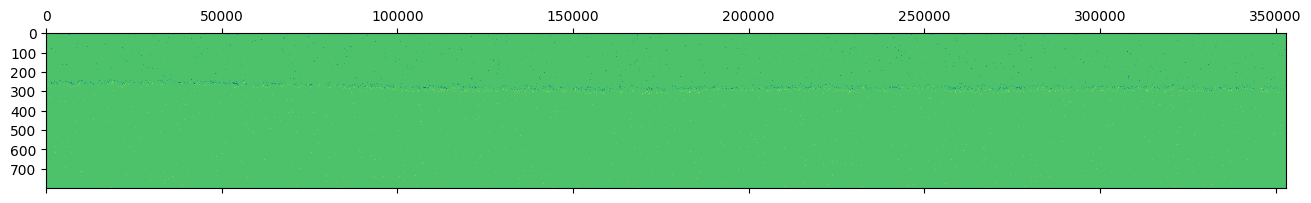

In [7]:
import matplotlib.pyplot as plt

# Assuming 'a[0]' is your DataFrame
plt.figure(figsize=(20, 10))
plt.matshow(a[0].to_numpy().T, aspect='auto')
plt.show()
